In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,roc_curve

import warnings
warnings.filterwarnings("ignore")

In [159]:
df=pd.read_csv("heart.csv")

In [160]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [161]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [163]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [164]:
for i in list(df.columns):
    print(f"{i} -- {df[i].value_counts().shape[0]}")

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


In [165]:
#categorical feature analysis
categorical_list=["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]

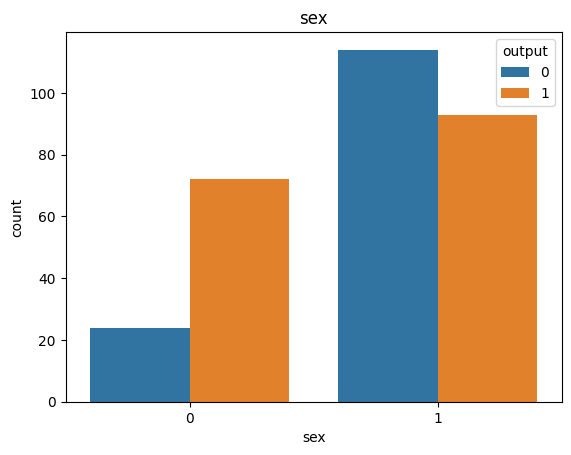

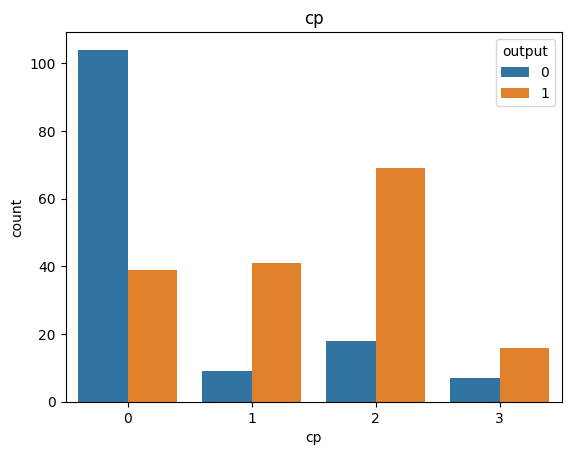

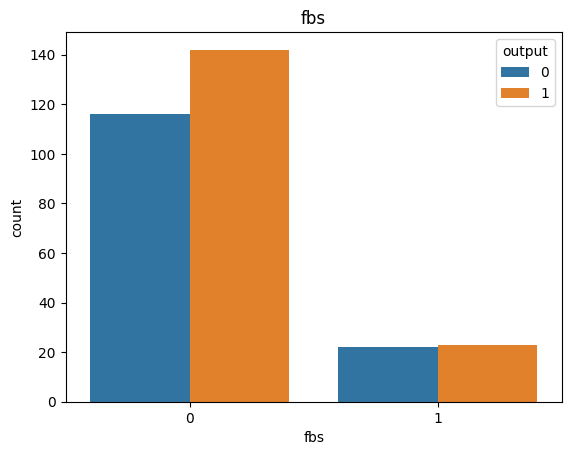

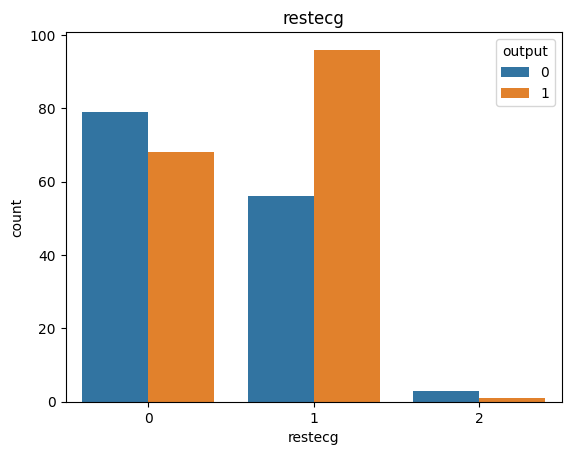

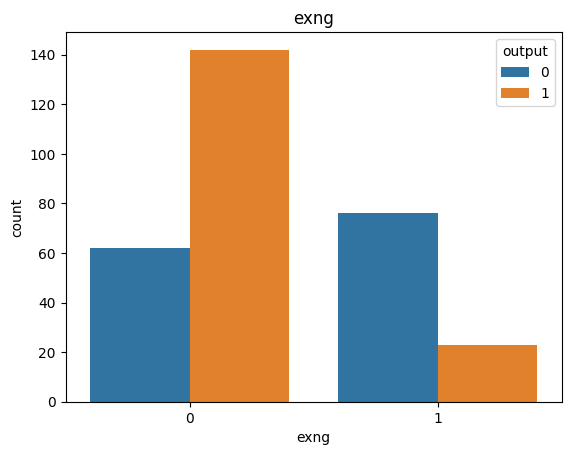

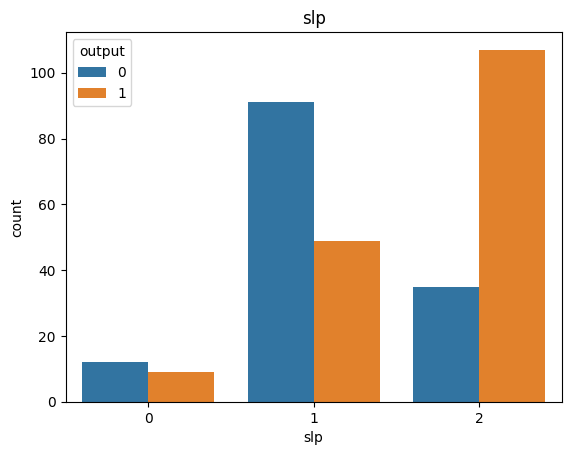

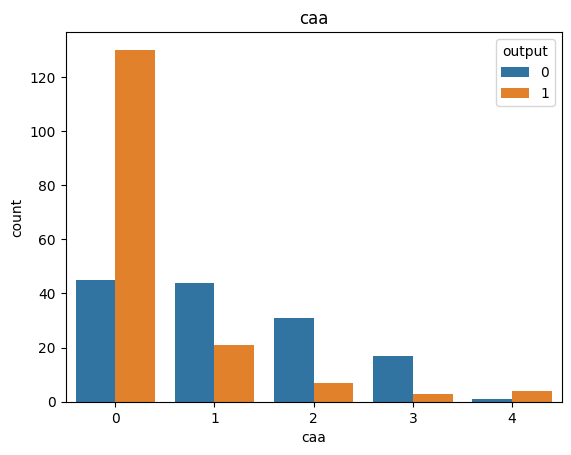

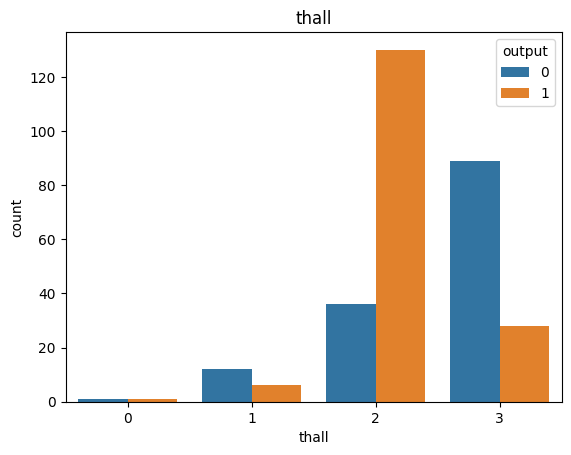

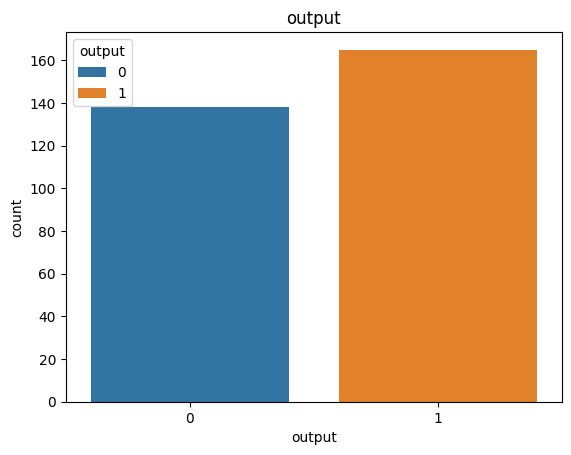

In [166]:
df_categoric=df.loc[:,categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x=i,data=df_categoric,hue="output")
    plt.title(i)

In [167]:
#numeric feature analysis
numeric_list=["age","trtbps","chol","thalachh","oldpeak","output"]

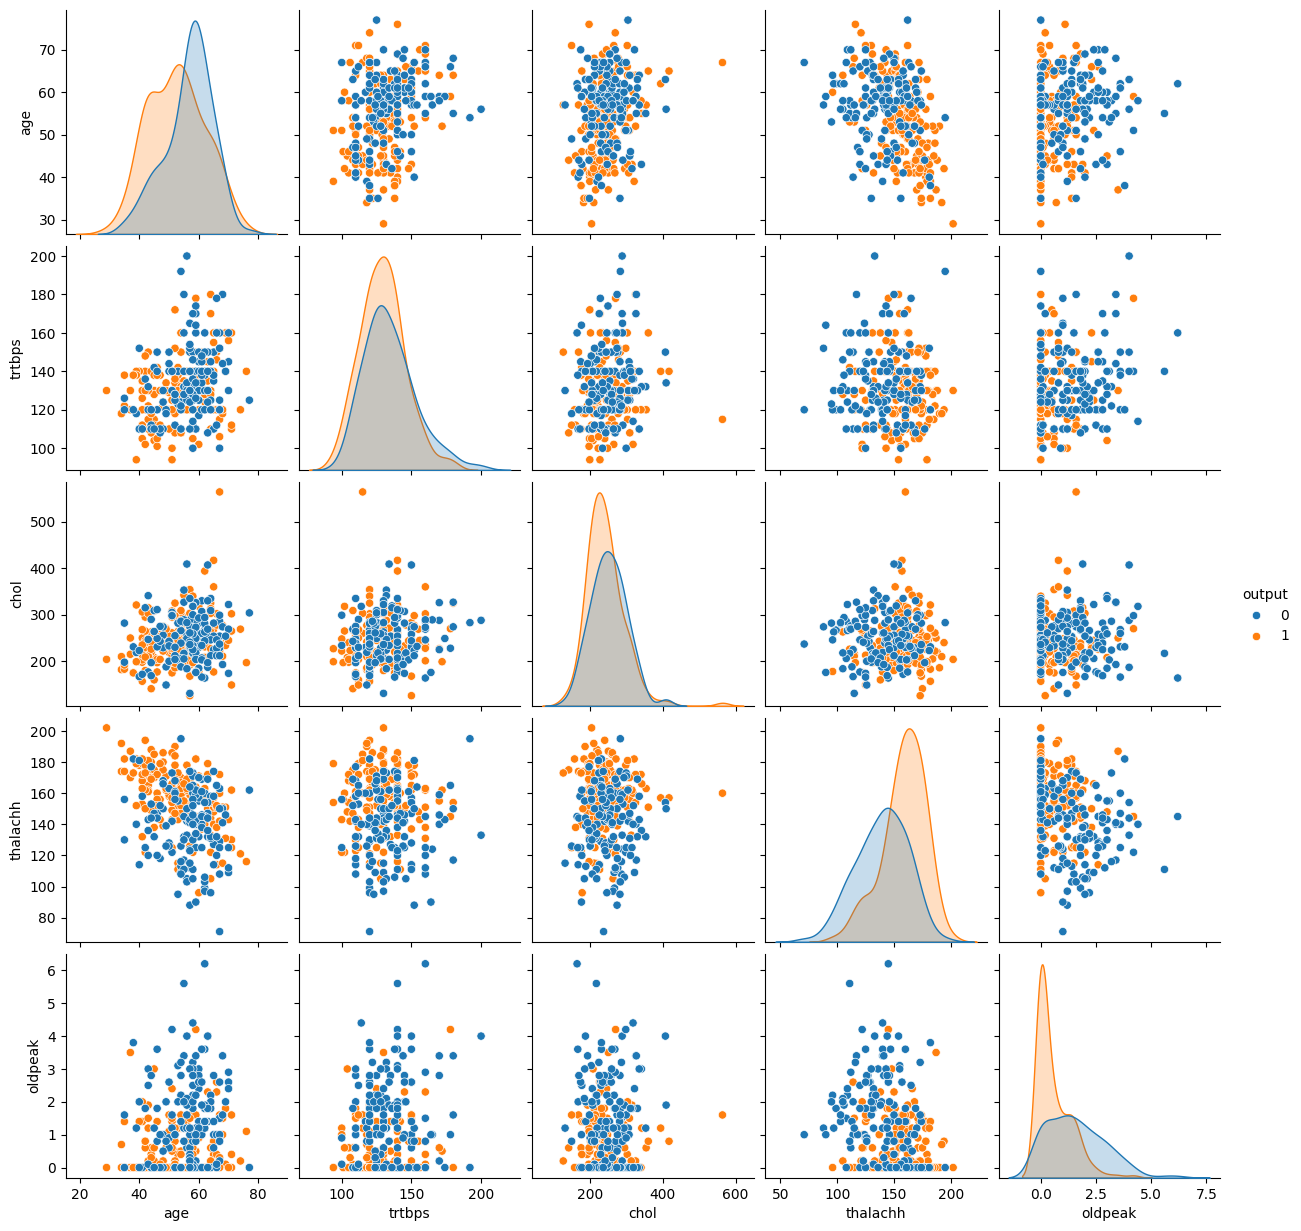

In [168]:
df_numeric=df.loc[:,numeric_list]
sns.pairplot(df_numeric,hue="output",diag_kind="kde")
plt.show()

In [169]:
#standardization
scaler=StandardScaler()

In [170]:
scaled_array=scaler.fit_transform(df[numeric_list[:-1]])

In [171]:
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]],
      shape=(303, 5))

In [172]:
pd.DataFrame(scaled_array).describe()

,0,1,2,3,4
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-7.035077e-16,-1.113887e-16,-6.800574e-16,2.345026e-17
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


In [173]:
#box plot analysis
df_dummy=pd.DataFrame(scaled_array,columns=numeric_list[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [174]:
df_dummy=pd.concat([df_dummy,df.loc[:,"output"]],axis=1)
df_dummy.head()


,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [175]:
data_melted=pd.melt(df_dummy,id_vars="output",var_name="features",value_name="value")
data_melted.head(20)

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
5,1,age,0.290464
6,1,age,0.180175
7,1,age,-1.143291
8,1,age,-0.260980
9,1,age,0.290464


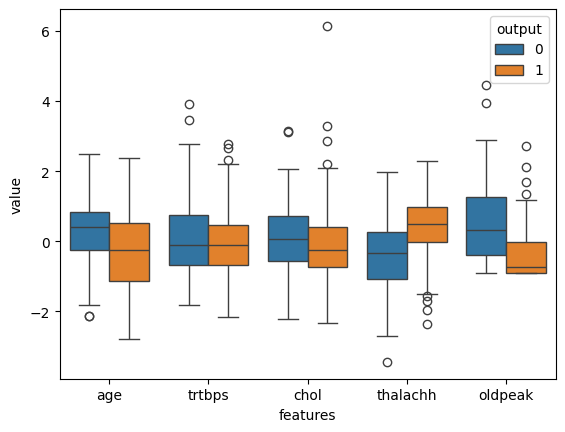

In [176]:
#box plot
plt.figure()
sns.boxplot(x="features",y="value",hue="output",data=data_melted)
plt.show()

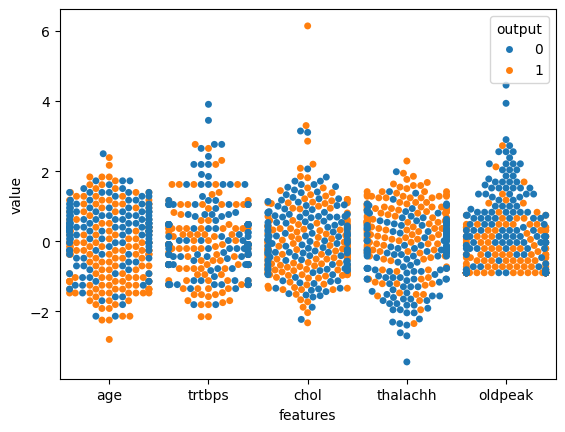

In [177]:
#swarm plot 
plt.figure()
sns.swarmplot(x="features",y="value",hue="output",data=data_melted)
plt.show()

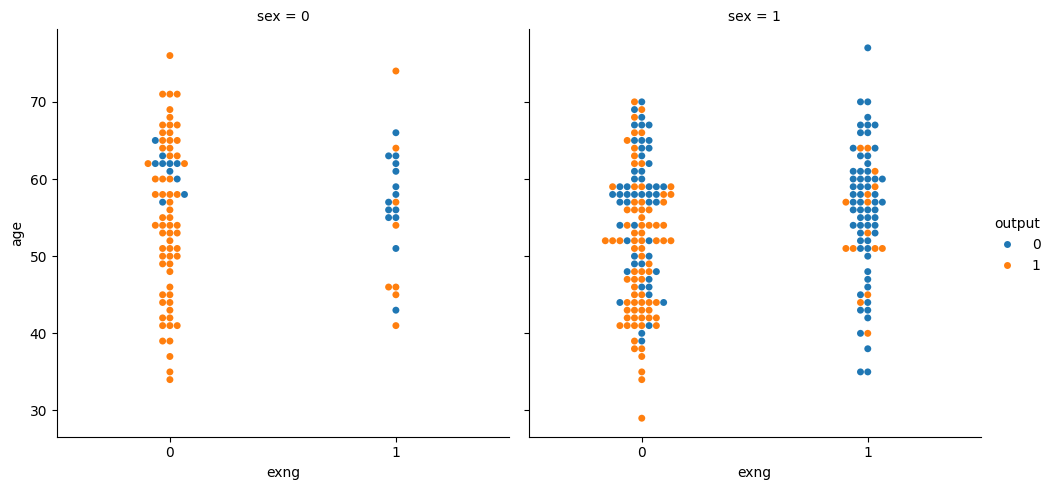

In [178]:
#cat plot
sns.catplot(x="exng",y="age",hue="output",col="sex",kind="swarm",data=df)
plt.show()

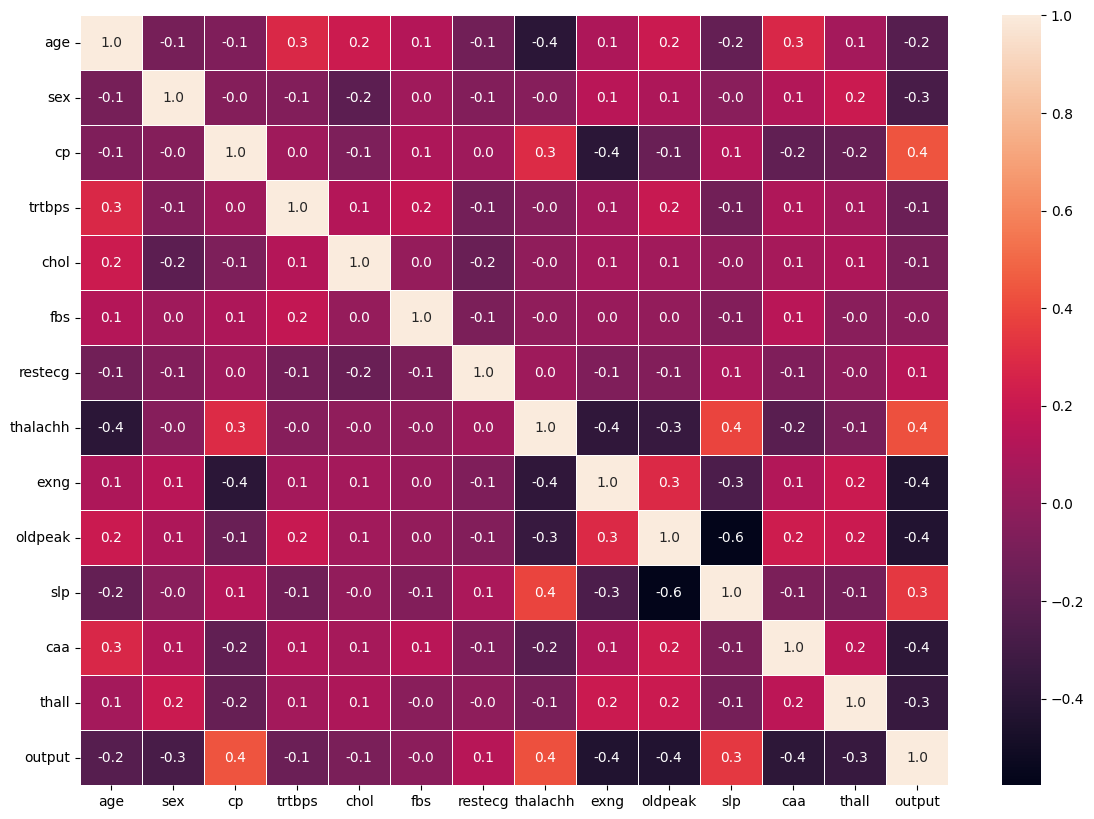

In [179]:
#correlation
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=.7)
plt.show()


In [180]:
numeric_list=["age","trtbps","chol","thalachh","oldpeak"]
df_numeric=df.loc[:,numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [181]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [182]:
#outlier detection
for i in numeric_list:

    #IQR
    Q1=np.percentile(df.loc[:i],25)
    Q3=np.percentile(df.loc[:i],75)

    IQR=Q3-Q1

    print("Old shape.: ",df.loc[:,i].shape)

    #upper bound
    upper=np.where(df.loc[:,i] >=(Q3+2.5*IQR))

    #lower bound
    lower=np.where(df.loc[:,i] <= (Q1-2.5*IQR))

    print("{}--{}".format(upper,lower))

    try:
        df.drop(upper[0],inplace=True)
    except: print(f"KeyError: {upper[0]} not found in axis")

    try:
        df.drop(lower[0],inplace=True)
    except: print(f"KeyError: {lower[0]} not found in axis")

    print("New shape.: ",df.shape)

Old shape.:  (303,)
(array([], dtype=int64),)--(array([], dtype=int64),)
New shape.:  (303, 14)
Old shape.:  (303,)
(array([223]),)--(array([], dtype=int64),)
New shape.:  (302, 14)
Old shape.:  (302,)
(array([  0,   1,   2,   3,   4,   6,   7,   8,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  28,
        29,  30,  32,  33,  34,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  54,  55,  56,  57,
        59,  60,  61,  63,  64,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 150, 152, 153, 154, 155, 156,
     

In [183]:
#modelling
df1=df.copy()

In [184]:
df1=pd.get_dummies(df1,columns=categorical_list[:-1],drop_first=True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [185]:
X=df1.drop(["output"],axis=1)
y=df1[["output"]]

In [186]:
scaler=StandardScaler()

In [187]:
X[numeric_list[:-1]]=scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.955048,0.799397,-0.255652,0.023097,2.3,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.948568,-0.078706,0.071426,1.661052,3.5,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.501857,-0.078706,-0.813607,0.997016,1.4,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.173306,-0.664108,-0.197932,1.262630,0.8,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.284983,-0.664108,2.072370,0.598594,0.6,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [188]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [189]:
log_reg=LogisticRegression()

In [190]:
log_reg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [191]:
y_pred_prob=log_reg.predict_proba(X_test)
y_pred_prob

array([[0.65483951, 0.34516049],
       [0.76727898, 0.23272102],
       [0.09045345, 0.90954655],
       [0.97644281, 0.02355719],
       [0.9731508 , 0.0268492 ],
       [0.77311788, 0.22688212],
       [0.96262207, 0.03737793],
       [0.9428173 , 0.0571827 ],
       [0.69588444, 0.30411556],
       [0.33775377, 0.66224623],
       [0.99184117, 0.00815883],
       [0.039253  , 0.960747  ],
       [0.93409523, 0.06590477],
       [0.99158925, 0.00841075],
       [0.14402685, 0.85597315],
       [0.11851534, 0.88148466],
       [0.64930159, 0.35069841],
       [0.59972021, 0.40027979],
       [0.0313736 , 0.9686264 ],
       [0.68850477, 0.31149523],
       [0.94146637, 0.05853363],
       [0.08614164, 0.91385836],
       [0.14557736, 0.85442264],
       [0.06758686, 0.93241314],
       [0.41534342, 0.58465658],
       [0.01195281, 0.98804719],
       [0.36230757, 0.63769243],
       [0.94098544, 0.05901456],
       [0.75311042, 0.24688958],
       [0.92719412, 0.07280588],
       [0.

In [192]:
y_pred=np.argmax(y_pred_prob,axis=1)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1])

In [193]:
print(f"test accuracy.: {accuracy_score(y_pred,y_test)}")

test accuracy.: 0.8


In [194]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob[:,1])

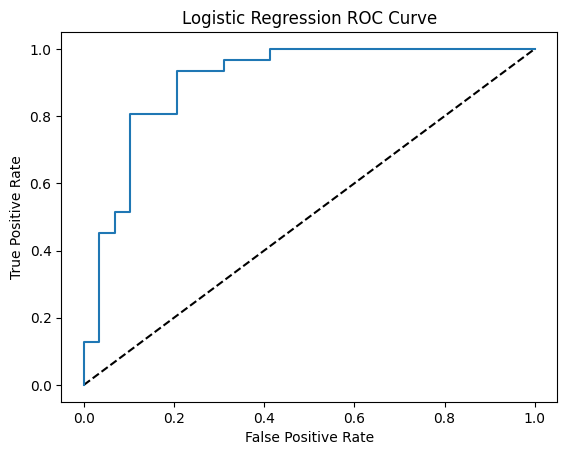

In [195]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

In [196]:
lr=LogisticRegression()

In [197]:
penalty=["l1","l2"]
parameters={"penalty":penalty}

In [198]:
lr_searcher=GridSearchCV(lr,parameters)

In [199]:
lr_searcher.fit(X_train,y_train)

,estimator,LogisticRegression()
,param_grid,"{'penalty': ['l1', 'l2']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [200]:
print("Best Parameters.: ",lr_searcher.best_params_)
y_pred=lr_searcher.predict(X_test)
print(f"test accuracy.: {accuracy_score(y_pred,y_test)}")

Best Parameters.:  {'penalty': 'l2'}
test accuracy.: 0.8
